In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load Kaggle House Prices dataset (train.csv must be uploaded or present)
df = pd.read_csv("../Data/Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 📊 Visualize Feature vs Target

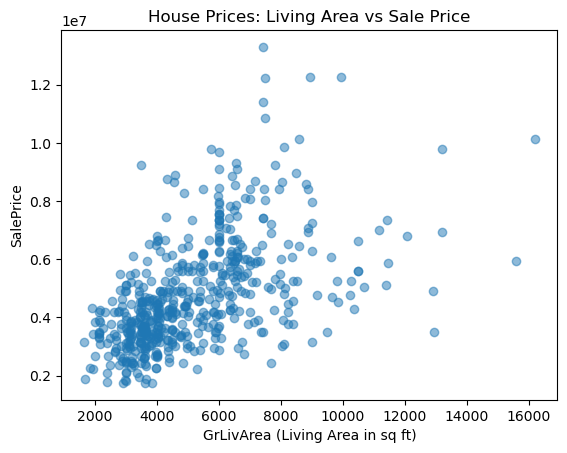

In [2]:

plt.scatter(df['area'], df['price'], alpha=0.5)
plt.xlabel("GrLivArea (Living Area in sq ft)")
plt.ylabel("SalePrice")
plt.title("House Prices: Living Area vs Sale Price")
plt.show()


## 🧮 Implement Simple Linear Regression (Least Squares)

In [3]:

X = df['area'].values
y = df['price'].values

# add bias term
X_b = np.c_[np.ones(len(X)), X]

# Closed-form solution: theta = (X^T X)^(-1) X^T y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best


array([2.38730848e+06, 4.61974894e+02])

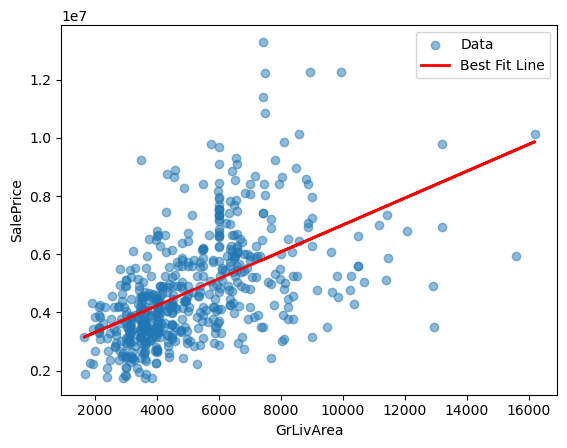

R² score: 0.2872931546811469


In [4]:

# Predictions
y_pred = X_b.dot(theta_best)

# Plot regression line
plt.scatter(X, y, alpha=0.5, label="Data")
plt.plot(X, y_pred, color="red", linewidth=2, label="Best Fit Line")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

print("R² score:", r2_score(y, y_pred))



## 💬 Discussion
- Why might a perfect fit to training data be harmful?
- Answer: Overfitting captures noise, reducing generalization to unseen data.



## 🏠 Homework
- Fit regression using another feature: `OverallQual` → `SalePrice`.
- Compare R² with `GrLivArea` model.
- Which feature is a stronger predictor?


R² Score: 0.6529242642153184
Mean Absolute Error: 970043.403920164


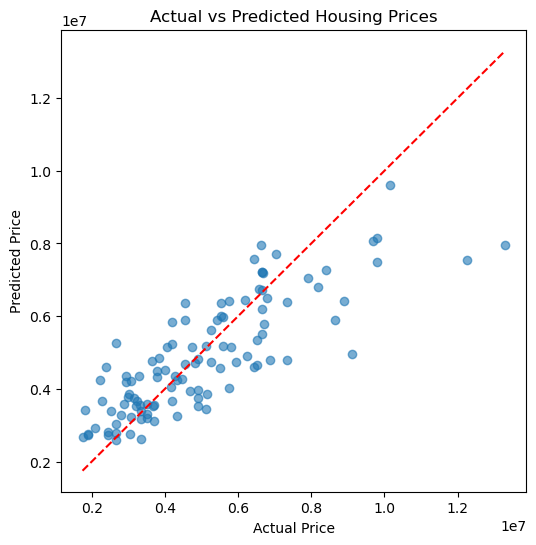

<Figure size 800x600 with 0 Axes>

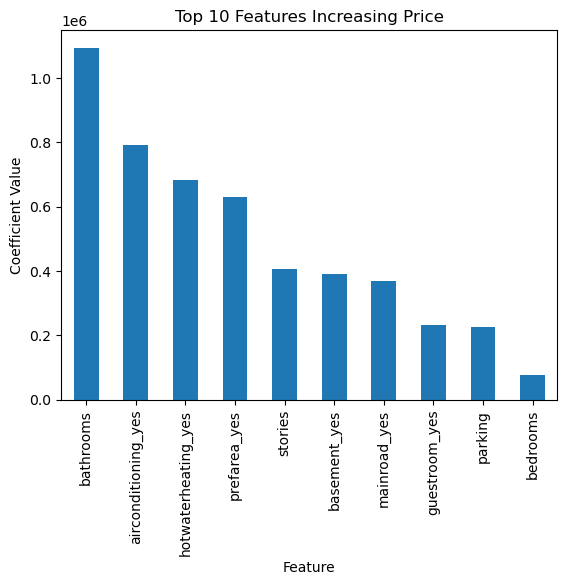

<Figure size 800x600 with 0 Axes>

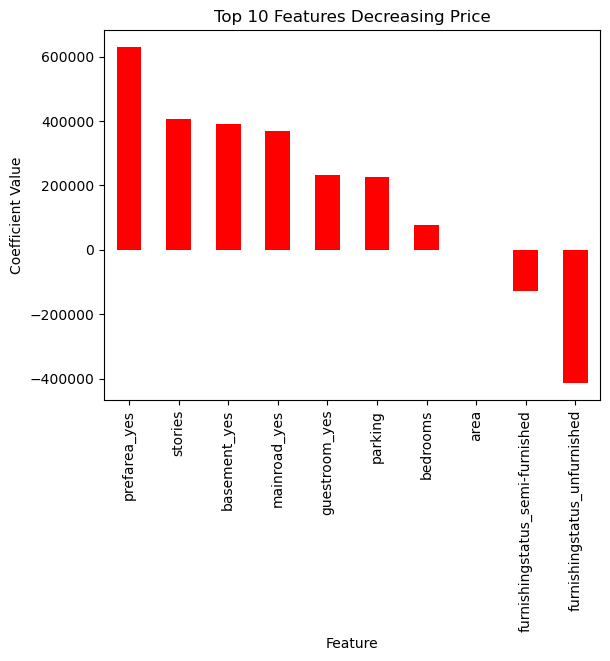

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("../Data/Housing.csv")

# Target and features
y = df["price"]
X = df.drop(columns=["price"])

# One-hot encode categorical columns (including furnishingstatus)
X = pd.get_dummies(X, drop_first=True)

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

# --- 1) Actual vs Predicted Prices ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # 45° line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.show()

# --- 2) Feature Importance (Coefficients) ---
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(8,6))
coefficients.head(10).plot(kind="bar", x="Feature", y="Coefficient", legend=False)
plt.title("Top 10 Features Increasing Price")
plt.ylabel("Coefficient Value")
plt.show()

plt.figure(figsize=(8,6))
coefficients.tail(10).plot(kind="bar", x="Feature", y="Coefficient", legend=False, color="red")
plt.title("Top 10 Features Decreasing Price")
plt.ylabel("Coefficient Value")
plt.show()
